In [431]:
#COSC3570 and MSCS4931 midterm project
#https://www.kaggle.com/szamil/who-suicide-statistics/version/1

#importing python libraries and setting plot style to fivethirtyeight
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

plt.style.use("fivethirtyeight")

In [541]:
#importing dataset
who_suicide_stats = Table.read_table("who_suicide_statistics.csv")

In [542]:
who_suicide_stats

country | year | sex    | age         | suicides_no | population
Albania | 1985 | female | 15-24 years | nan         | 277900
Albania | 1985 | female | 25-34 years | nan         | 246800
Albania | 1985 | female | 35-54 years | nan         | 267500
Albania | 1985 | female | 5-14 years  | nan         | 298300
Albania | 1985 | female | 55-74 years | nan         | 138700
Albania | 1985 | female | 75+ years   | nan         | 34200
Albania | 1985 | male   | 15-24 years | nan         | 301400
Albania | 1985 | male   | 25-34 years | nan         | 264200
Albania | 1985 | male   | 35-54 years | nan         | 296700
Albania | 1985 | male   | 5-14 years  | nan         | 325800
... (43766 rows omitted)

In [535]:
#The dataset in its intial form contains a column "sex" - in my opinion it would be easier to read the table if 
#females & males were given their own column rather than sharing a column. To do this I have used the .where() method 
#to find only female data for all categories of the original table (minus sex as it is no longer needed) and assigned 
#this to the variable "females". For "males" only suicide number and population is needed because "females" already 
#contains the other columns.

females = who_suicide_stats.where("sex", "female").select("country", "year", "age", "suicides_no", "population").relabeled(4, "female pop.").relabeled(3, "female suicides")
males = who_suicide_stats.where("sex", "male").select("suicides_no", "population").relabeled(1, "male pop.")

In [412]:
#"suicides" adds on the male data from "males" to the "females" table 
suicides = females.with_columns("male suicides", males.column("suicides_no"), "male pop.", males.column("male pop."))

In [413]:
#In this project I am concerned with only suicide data from the United States, I am using .where() to find where in 
#"suicides" the country is "United States of America". The resulting table contains the columns "year", "age", 
#"female pop.", "male suicides", "male pop." for suicide data in the US.
US_suicides = suicides.where("country", "United States of America").select("year", "age", "female suicides", 
                                                                           "female pop.", "male suicides", "male pop.")

In [543]:
#The intial dataset as provided by Kaggle contains suicide statistics from 1979-2016. However, if you look at the data
#from 2016, you will find that data for this year has not been collected yet, and as a result the suicide statistics
#for males and females have been set to "nan". This year, therefore, is not of any help and can be removed from the 
#table by setting "US_suicides" equal to "US_suicides" where the year is below 2016.
US_suicides = US_suicides.where("year", are.below(2016))   

In [491]:
US_suicides

year | age         | female suicides | female pop. | male suicides | male pop.
1979 | 15-24 years | 1001            | 2.1039e+07  | 4245          | 2.1405e+07
1979 | 25-34 years | 1352            | 1.8176e+07  | 4505          | 1.7862e+07
1979 | 35-54 years | 2458            | 2.4669e+07  | 5207          | 2.338e+07
1979 | 5-14 years  | 48              | 1.7317e+07  | 104           | 1.8075e+07
1979 | 55-74 years | 1705            | 2.0097e+07  | 4593          | 1.6689e+07
1979 | 75+ years   | 384             | 6.29e+06    | 1587          | 3.505e+06
1980 | 15-24 years | 903             | 2.1048e+07  | 4336          | 2.1433e+07
1980 | 25-34 years | 1322            | 1.8856e+07  | 4598          | 1.8563e+07
1980 | 35-54 years | 2214            | 2.4903e+07  | 5344          | 2.3647e+07
1980 | 5-14 years  | 26              | 1.7029e+07  | 116           | 1.7798e+07
... (212 rows omitted)

In [545]:
#One of the question I have formed from my literature review is "do men commit more suicides than women". For this 
#question I am concerned solely with the total suicides commited by males and females for each year. This cell begins
#this process by showing only the ages and the associated female and male suicide statistics.
comparison = US_suicides.select("year", "age", "female suicides", "male suicides")

In [546]:
comparison.show(222)

In [547]:
#Transforms the data from table view into an array. This is being done on the column "female suicides". This will be
#used in the upcoming steps.
fs = US_suicides.column("female suicides")

In [548]:
fs    

array([1001., 1352., 2458.,   48., 1705.,  384.,  903., 1322., 2214.,
         26., 1548.,  350.,  960., 1437., 2374.,   48., 1640.,  324.,
        864., 1377., 2304.,   40., 1663.,  367.,  864., 1321., 2176.,
         53., 1666.,  428.,  877., 1267., 2267.,   55., 1696.,  433.,
        854., 1242., 2105.,   73., 1568.,  466.,  844., 1261., 2299.,
         56., 1696.,  521.,  815., 1285., 2270.,   52., 1596.,  504.,
        786., 1247., 2209.,   62., 1504.,  519.,  764., 1226., 2159.,
         56., 1432.,  491.,  709., 1211., 2175.,   69., 1504.,  511.,
        678., 1153., 2296.,   58., 1342.,  511.,  649., 1070., 2348.,
         82., 1325.,  549.,  730., 1089., 2362.,   88., 1304.,  519.,
        654., 1059., 2472.,   88., 1179.,  514.,  652., 1058., 2454.,
         77., 1157.,  516.,  634., 1013., 2594.,   77., 1118.,  463.,
        627.,  988., 2758.,   74., 1095.,  499.,  603.,  961., 2776.,
         83., 1094.,  520.,  575.,  912., 2674.,   50., 1061.,  469.,
        570.,  854.,

In [96]:
#As I have mentioned above, for my first question I am concerned with the total female and male suicides of each year.
#An array named "girls" is created to store the total female suicides from each year
#the number of values in "fs" is 222, and there are six different age categories. 
#Looking at "comparison" we can confirm that there are six age categories. That means that for each year we must add up
#these six ages to find the overall suicides for that year. To do this we can use a for loop that increments by six
#everytime it is looped through. This places i ater each iteration at the first instance of a year. For example the 
#third loop through the for loop places us at "fs" = 960. Looking back at "comparison" we see this is the first 
#instance of the year 1981. From here the value of female suicides in a year can be calculated by taking the i value,
#that places us at the beginning of the year, and adding to it the next five terms of "fs". This is done 37 times, 
#thus, there are 37 values stored in girls representing the total number of female suicides for each year.

girls = []
for i in range(0, 222, 6):
    #for j in range(0, 36):
        girls.append(fs[i] + fs[i+1] + fs[i+2] + fs[i+3] + fs[i+4] + fs[i+5])

In [97]:
girls

[6948.0,
 6363.0,
 6783.0,
 6615.0,
 6508.0,
 6595.0,
 6308.0,
 6677.0,
 6522.0,
 6327.0,
 6128.0,
 6179.0,
 6038.0,
 6023.0,
 6092.0,
 5966.0,
 5914.0,
 5899.0,
 6041.0,
 6037.0,
 5741.0,
 5732.0,
 5949.0,
 6246.0,
 6281.0,
 6873.0,
 6729.0,
 6992.0,
 7329.0,
 7583.0,
 7821.0,
 8087.0,
 8512.0,
 8819.0,
 9094.0,
 9659.0,
 10199.0]

In [98]:
#Transforms the data from table view into an array. This is being done on the column "male suicides". This will be
#used in the upcoming steps.
ms = US_suicides.column("male suicides")

In [99]:
ms

array([ 4245.,  4505.,  5207.,   104.,  4593.,  1587.,  4336.,  4598.,
        5344.,   116.,  4538.,  1557.,  4201.,  4906.,  5462.,   119.,
        4523.,  1580.,  4161.,  4939.,  5721.,   160.,  4890.,  1740.,
        3981.,  5017.,  5759.,   152.,  4931.,  1932.,  4149.,  5125.,
        5983.,   177.,  5295.,  1943.,  4267.,  5134.,  6053.,   205.,
        5302.,  2177.,  4276.,  5450.,  6450.,   199.,  5500.,  2340.,
        4109.,  5370.,  6569.,   199.,  5482.,  2532.,  4143.,  5463.,
        6528.,   181.,  5198.,  2548.,  4106.,  5339.,  6814.,   184.,
        5185.,  2462.,  4160.,  5339.,  7260.,   195.,  5109.,  2653.,
        4073.,  5361.,  7454.,   208.,  4983.,  2673.,  4044.,  5102.,
        7679.,   232.,  4818.,  2573.,  4119.,  5218.,  7976.,   233.,
        4797.,  2649.,  4302.,  5295.,  8199.,   234.,  4498.,  2629.,
        4132.,  5234.,  8545.,   260.,  4607.,  2580.,  3724.,  4848.,
        8984.,   225.,  4613.,  2586.,  3559.,  4684.,  8920.,   233.,
      

In [101]:
#As explained for "girls" "boys" follows the same logic. An array named "boys" is created to store the total number of
#male suicides for each year. The logic provided in the for loops allows for the initial instance of each year to be 
#picked up by i. The following five values represent the other five age categories for a certain year. Thus, adding up
#all six categories provides us with the total number of male suicides for a specific year.
#Like "girls", "boys" will contain 37 values for the 37 years present in the table.

boys = []
for i in range(0,222,6):
    boys.append(ms[i] + ms[i+1] + ms[i+2] + ms[i+3] + ms[i+4] + ms[i+5])

In [102]:
boys

[20241.0,
 20489.0,
 20791.0,
 21611.0,
 21772.0,
 22672.0,
 23138.0,
 24215.0,
 24261.0,
 24061.0,
 24090.0,
 24716.0,
 24752.0,
 24448.0,
 24992.0,
 25157.0,
 25358.0,
 24980.0,
 24476.0,
 24521.0,
 23442.0,
 23611.0,
 24658.0,
 25399.0,
 25196.0,
 25555.0,
 25900.0,
 26300.0,
 27267.0,
 28447.0,
 29079.0,
 30275.0,
 30996.0,
 31777.0,
 32049.0,
 33110.0,
 33990.0]

In [105]:
#an array named "year" is created to store the 37 years present in the dataset
#each iteration adds a year to "year" 

year = []
for i in range(1979, 2016):
    year.append(i)

In [106]:
year

[1979,
 1980,
 1981,
 1982,
 1983,
 1984,
 1985,
 1986,
 1987,
 1988,
 1989,
 1990,
 1991,
 1992,
 1993,
 1994,
 1995,
 1996,
 1997,
 1998,
 1999,
 2000,
 2001,
 2002,
 2003,
 2004,
 2005,
 2006,
 2007,
 2008,
 2009,
 2010,
 2011,
 2012,
 2013,
 2014,
 2015]

In [108]:
total_suicides = US_suicides.select("female pop.", "male pop.")

In [110]:
total_suicides

female pop. | male pop.
2.1039e+07  | 2.1405e+07
1.8176e+07  | 1.7862e+07
2.4669e+07  | 2.338e+07
1.7317e+07  | 1.8075e+07
2.0097e+07  | 1.6689e+07
6.29e+06    | 3.505e+06
2.1048e+07  | 2.1433e+07
1.8856e+07  | 1.8563e+07
2.4903e+07  | 2.3647e+07
1.7029e+07  | 1.7798e+07
... (212 rows omitted)

In [112]:
#Transforms the data from table view into an array. This is being done on the column "female pop.". This will be
#used in the upcoming steps.
fp = US_suicides.column("female pop.")

In [113]:
fp

array([21039000., 18176000., 24669000., 17317000., 20097000.,  6290000.,
       21048000., 18856000., 24903000., 17029000., 20445000.,  6483000.,
       20839000., 19537000., 25106000., 16765000., 20689000.,  6692000.,
       20517000., 19771000., 25837500., 16605500., 20905500.,  6914000.,
       20735000., 19979000., 26109000., 16782000., 21124000.,  6987000.,
       19872000., 20663000., 27106000., 16580000., 21246000.,  7275000.,
       19589000., 21041000., 27763000., 16553000., 21366000.,  7469000.,
       19313000., 21391000., 28520000., 16517000., 21455000.,  7669000.,
       18925000., 21645000., 29359000., 16660000., 21497000.,  7872000.,
       18501000., 21822000., 30281000., 16904000., 21491000.,  8062000.,
       18055000., 21892000., 31264000., 17151000., 21480000.,  8262000.,
       18097900., 21596400., 31749500., 17124400., 21296300.,  8447400.,
       17790000., 21450000., 33017000., 17520000., 21331000.,  8705000.,
       17668700., 21212300., 34156600., 17783300., 

In [114]:
#As explained for the categories female and male suicides "fepop" follows the same logic. An array named "fepop" is 
#created to store the total female population for each year. The logic provided in the for loops allows for the
#initial instance of each year to be picked up by i. The following five values represent the other five age categories for a certain year. Thus, adding up
#all six categories provides us with the total female population for a specific year.
#Like the other arrays above, "fepop" will contain 37 values for the 37 years present in the table.

fepop = []
for i in range(0,222,6):
    fepop.append(fp[i] + fp[i+1] + fp[i+2] + fp[i+3] + fp[i+4] + fp[i+5])

In [115]:
fepop

[107588000.0,
 108764000.0,
 109628000.0,
 110550500.0,
 111716000.0,
 112742000.0,
 113781000.0,
 114865000.0,
 115958000.0,
 117061000.0,
 118104000.0,
 118311900.0,
 119813000.0,
 121065900.0,
 122367300.0,
 123632000.0,
 124875600.0,
 126055200.0,
 127269600.0,
 128982300.0,
 130154787.0,
 134003278.0,
 135519720.0,
 137123948.0,
 138109635.0,
 139309727.0,
 140488280.0,
 141910455.0,
 142743825.0,
 143315811.0,
 144708230.0,
 146028555.0,
 147236386.0,
 148454780.0,
 149659609.0,
 150830949.0,
 151958511.0]

In [116]:
#Transforms the data from table view into an array. This is being done on the column "male pop.". This will be
#used in the upcoming steps.
mp = US_suicides.column("male pop.")

In [117]:
#As explained for the categories female and male suicides "mapop" follows the same logic. An array named "mapop" is 
#created to store the total male population for each year. The logic provided in the for loops allows for the
#initial instance of each year to be picked up by i. The following five values represent the other five age categories for a certain year. Thus, adding up
#all six categories provides us with the total male population for a specific year.
#Like the other arrays above, "mapop" will contain 37 values for the 37 years present in the table.

mapop = []
for i in range(0,222,6):
    mapop.append(mp[i] + mp[i+1] + mp[i+2] + mp[i+3] + mp[i+4] + mp[i+5])

In [118]:
mapop

[100916000.0,
 101981000.0,
 102778000.0,
 103611500.0,
 104707000.0,
 105893000.0,
 106942000.0,
 108088000.0,
 109190000.0,
 110292000.0,
 111383000.0,
 111640300.0,
 113142000.0,
 114499700.0,
 115725000.0,
 116982100.0,
 118288600.0,
 119942600.0,
 121216800.0,
 122350200.0,
 123593884.0,
 128242830.0,
 129907826.0,
 131635611.0,
 132931875.0,
 134274409.0,
 135618400.0,
 137070393.0,
 137914781.0,
 139039754.0,
 140454432.0,
 141810594.0,
 143077439.0,
 144372348.0,
 145663253.0,
 146918786.0,
 148120000.0]

In [119]:
#The resulting table "total_suicides" is made from the following arrays that were created above: "year", girls", 
#"fepop", "boys", "mapop" 
#this table now shows the total number of suicides for females and males according to year, as well as their respective
#populations according to the year
total_suicides = Table().with_columns("year", year, "female suicides", girls, "female pop.", fepop, 
                                      "male suicides", boys, "male pop.", mapop)

In [120]:
total_suicides

year | female suicides | female pop. | male suicides | male pop.
1979 | 6948            | 1.07588e+08 | 20241         | 1.00916e+08
1980 | 6363            | 1.08764e+08 | 20489         | 1.01981e+08
1981 | 6783            | 1.09628e+08 | 20791         | 1.02778e+08
1982 | 6615            | 1.10550e+08 | 21611         | 1.03612e+08
1983 | 6508            | 1.11716e+08 | 21772         | 1.04707e+08
1984 | 6595            | 1.12742e+08 | 22672         | 1.05893e+08
1985 | 6308            | 1.13781e+08 | 23138         | 1.06942e+08
1986 | 6677            | 1.14865e+08 | 24215         | 1.08088e+08
1987 | 6522            | 1.15958e+08 | 24261         | 1.0919e+08
1988 | 6327            | 1.17061e+08 | 24061         | 1.10292e+08
... (27 rows omitted)

In [121]:
#For question 1 comparison of total suicides for females and males is desired
#"comp" is the resulting table of "total_suicides" where year, female suicides, and male suicides are included
comp = total_suicides.select("year", "female suicides", "male suicides")

In [122]:
comp

year | female suicides | male suicides
1979 | 6948            | 20241
1980 | 6363            | 20489
1981 | 6783            | 20791
1982 | 6615            | 21611
1983 | 6508            | 21772
1984 | 6595            | 22672
1985 | 6308            | 23138
1986 | 6677            | 24215
1987 | 6522            | 24261
1988 | 6327            | 24061
... (27 rows omitted)

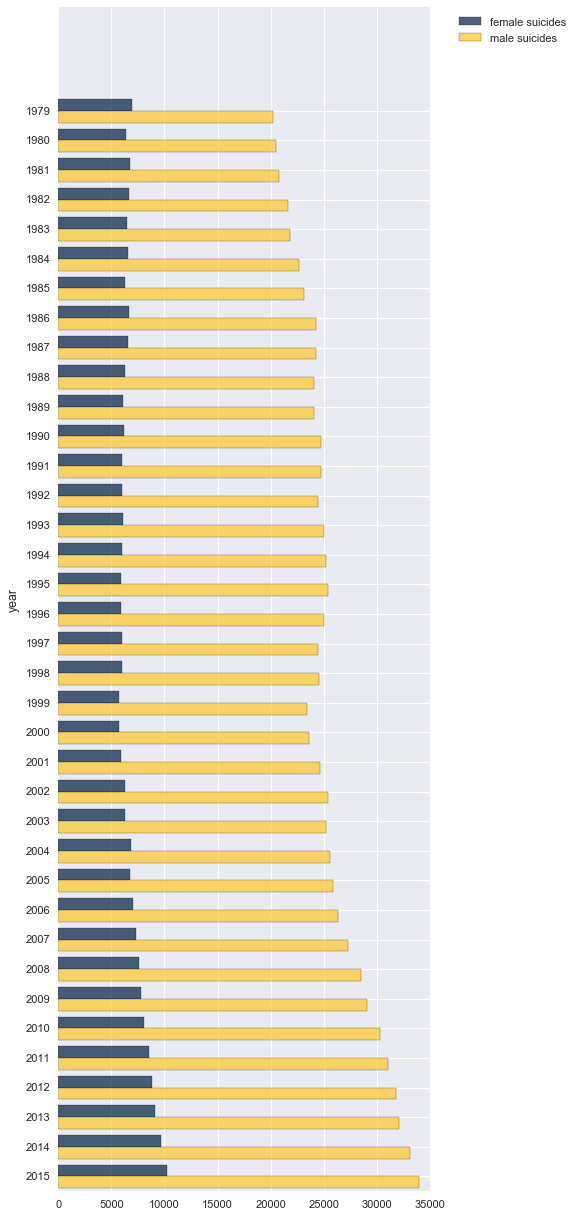

In [123]:
#Creates a horizontal bar graph of female and male suicides for each year
comp.barh("year")

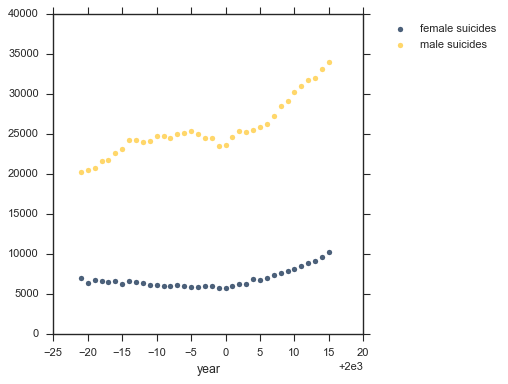

In [133]:
#Another vizualization that answer question 1
#creates a scatter plot female and male suicides according to the year
#if you notice the tick marks for year do not make sense at first glance. However, upon closer evaluation they place
#2000 at zero each tick beore and after that represents five years before or after the date
comp.scatter("year")

In [176]:
#My second question formed from my literature review is "are higher rates of suicide being reported in youths and 
#"adolescence"

#To begin creating the visualizations for this question, I want to start by creating a table that displays the number 
#of suicides for each age group (gender included) for each year. To do so I need to first seperate the data into each
#age category.
#This step results in a table of suicide statistics for 15-24 y.o
fif24 = US_suicides.where("age", "15-24 years")
fif24

year | age         | female suicides | female pop. | male suicides | male pop.
1979 | 15-24 years | 1001            | 2.1039e+07  | 4245          | 2.1405e+07
1980 | 15-24 years | 903             | 2.1048e+07  | 4336          | 2.1433e+07
1981 | 15-24 years | 960             | 2.0839e+07  | 4201          | 2.1283e+07
1982 | 15-24 years | 864             | 2.0517e+07  | 4161          | 2.09905e+07
1983 | 15-24 years | 864             | 2.0735e+07  | 3981          | 2.1212e+07
1984 | 15-24 years | 877             | 1.9872e+07  | 4149          | 2.024e+07
1985 | 15-24 years | 854             | 1.9589e+07  | 4267          | 1.9962e+07
1986 | 15-24 years | 844             | 1.9313e+07  | 4276          | 1.9715e+07
1987 | 15-24 years | 815             | 1.8925e+07  | 4109          | 1.9327e+07
1988 | 15-24 years | 786             | 1.8501e+07  | 4143          | 1.8897e+07
... (27 rows omitted)

In [177]:
#This step results in a table of suicide statistics for 25-34 y.o
twen34 = US_suicides.where("age", "25-34 years")
twen34

year | age         | female suicides | female pop. | male suicides | male pop.
1979 | 25-34 years | 1352            | 1.8176e+07  | 4505          | 1.7862e+07
1980 | 25-34 years | 1322            | 1.8856e+07  | 4598          | 1.8563e+07
1981 | 25-34 years | 1437            | 1.9537e+07  | 4906          | 1.9273e+07
1982 | 25-34 years | 1377            | 1.9771e+07  | 4939          | 1.9532e+07
1983 | 25-34 years | 1321            | 1.9979e+07  | 5017          | 1.9739e+07
1984 | 25-34 years | 1267            | 2.0663e+07  | 5125          | 2.0567e+07
1985 | 25-34 years | 1242            | 2.1041e+07  | 5134          | 2.0986e+07
1986 | 25-34 years | 1261            | 2.1391e+07  | 5450          | 2.1393e+07
1987 | 25-34 years | 1285            | 2.1645e+07  | 5370          | 2.167e+07
1988 | 25-34 years | 1247            | 2.1822e+07  | 5463          | 2.1853e+07
... (27 rows omitted)

In [178]:
#This step results in a table of suicide statistics for 35-54 y.o
thir54 = US_suicides.where("age", "35-54 years")
thir54

year | age         | female suicides | female pop. | male suicides | male pop.
1979 | 35-54 years | 2458            | 2.4669e+07  | 5207          | 2.338e+07
1980 | 35-54 years | 2214            | 2.4903e+07  | 5344          | 2.3647e+07
1981 | 35-54 years | 2374            | 2.5106e+07  | 5462          | 2.3879e+07
1982 | 35-54 years | 2304            | 2.58375e+07 | 5721          | 2.46155e+07
1983 | 35-54 years | 2176            | 2.6109e+07  | 5759          | 2.4876e+07
1984 | 35-54 years | 2267            | 2.7106e+07  | 5983          | 2.5932e+07
1985 | 35-54 years | 2105            | 2.7763e+07  | 6053          | 2.6589e+07
1986 | 35-54 years | 2299            | 2.852e+07   | 6450          | 2.7363e+07
1987 | 35-54 years | 2270            | 2.9359e+07  | 6569          | 2.8222e+07
1988 | 35-54 years | 2209            | 3.0281e+07  | 6528          | 2.9147e+07
... (27 rows omitted)

In [179]:
#This step results in a table of suicide statistics for 5-14 y.o
five14 = US_suicides.where("age", "5-14 years")
five14

year | age        | female suicides | female pop. | male suicides | male pop.
1979 | 5-14 years | 48              | 1.7317e+07  | 104           | 1.8075e+07
1980 | 5-14 years | 26              | 1.7029e+07  | 116           | 1.7798e+07
1981 | 5-14 years | 48              | 1.6765e+07  | 119           | 1.7527e+07
1982 | 5-14 years | 40              | 1.66055e+07 | 160           | 1.73745e+07
1983 | 5-14 years | 53              | 1.6782e+07  | 152           | 1.7558e+07
1984 | 5-14 years | 55              | 1.658e+07   | 177           | 1.7394e+07
1985 | 5-14 years | 73              | 1.6553e+07  | 205           | 1.737e+07
1986 | 5-14 years | 56              | 1.6517e+07  | 199           | 1.7338e+07
1987 | 5-14 years | 52              | 1.666e+07   | 199           | 1.7486e+07
1988 | 5-14 years | 62              | 1.6904e+07  | 181           | 1.7751e+07
... (27 rows omitted)

In [211]:
#This step results in a table of suicide statistics for 55-74 y.o
fif74 = US_suicides.where("age", "55-74 years")
fif74

year | age         | female suicides | female pop. | male suicides | male pop.
1979 | 55-74 years | 1705            | 2.0097e+07  | 4593          | 1.6689e+07
1980 | 55-74 years | 1548            | 2.0445e+07  | 4538          | 1.6962e+07
1981 | 55-74 years | 1640            | 2.0689e+07  | 4523          | 1.7147e+07
1982 | 55-74 years | 1663            | 2.09055e+07 | 4890          | 1.7325e+07
1983 | 55-74 years | 1666            | 2.1124e+07  | 4931          | 1.7508e+07
1984 | 55-74 years | 1696            | 2.1246e+07  | 5295          | 1.7802e+07
1985 | 55-74 years | 1568            | 2.1366e+07  | 5302          | 1.7971e+07
1986 | 55-74 years | 1696            | 2.1455e+07  | 5500          | 1.8101e+07
1987 | 55-74 years | 1596            | 2.1497e+07  | 5482          | 1.819e+07
1988 | 55-74 years | 1504            | 2.1491e+07  | 5198          | 1.8235e+07
... (27 rows omitted)

In [181]:
#This step results in a table of suicide statistics for 75+ y.o
sev5 = US_suicides.where("age", "75+ years")
sev5

year | age       | female suicides | female pop. | male suicides | male pop.
1979 | 75+ years | 384             | 6.29e+06    | 1587          | 3.505e+06
1980 | 75+ years | 350             | 6.483e+06   | 1557          | 3.578e+06
1981 | 75+ years | 324             | 6.692e+06   | 1580          | 3.669e+06
1982 | 75+ years | 367             | 6.914e+06   | 1740          | 3.774e+06
1983 | 75+ years | 428             | 6.987e+06   | 1932          | 3.814e+06
1984 | 75+ years | 433             | 7.275e+06   | 1943          | 3.958e+06
1985 | 75+ years | 466             | 7.469e+06   | 2177          | 4.064e+06
1986 | 75+ years | 521             | 7.669e+06   | 2340          | 4.178e+06
1987 | 75+ years | 504             | 7.872e+06   | 2532          | 4.295e+06
1988 | 75+ years | 519             | 8.062e+06   | 2548          | 4.409e+06
... (27 rows omitted)

In [536]:
#At this step age groups have already been separated. 
#From these separated tables we can now create arrays of gender based age groups
females75 = sev5.column("female suicides")
females55 = fif74.column("female suicides")
females35 = thir54.column("female suicides")
females25 = twen34.column("female suicides")
females15 = fif24.column("female suicides")
females5 = five14.column("female suicides")

males75 = sev5.column("male suicides")
males55 = fif74.column("male suicides")
males35 = thir54.column("male suicides")
males25 = twen34.column("male suicides")
males15 = fif24.column("male suicides")
males5 = five14.column("male suicides")

In [539]:
#A table is created with a coulumn for each age group and their respective gender
ages = Table().with_columns("year", year, "5-14 y.o females", females5, "5-14 y.o males", males5, 
                                        "15-24 y.o females", females15, "15-24 y.o males", males15,
                                        "25-34 y.o females", females25, "25-34 y.o males", males25,
                                        "35-54 y.o females", females35, "35-54 y.o males", males35,
                                        "55-74 y.o females", females55, "55-74 y.o males", males55,
                                        "75+ y.o females", females75, "75+ y.o males", males75)


In [540]:
ages

year | 5-14 y.o females | 5-14 y.o males | 15-24 y.o females | 15-24 y.o males | 25-34 y.o females | 25-34 y.o males | 35-54 y.o females | 35-54 y.o males | 55-74 y.o females | 55-74 y.o males | 75+ y.o females | 75+ y.o males
1979 | 48               | 104            | 1001              | 4245            | 1352              | 4505            | 2458              | 5207            | 1705              | 4593            | 384             | 1587
1980 | 26               | 116            | 903               | 4336            | 1322              | 4598            | 2214              | 5344            | 1548              | 4538            | 350             | 1557
1981 | 48               | 119            | 960               | 4201            | 1437              | 4906            | 2374              | 5462            | 1640              | 4523            | 324             | 1580
1982 | 40               | 160            | 864               | 4161            | 1377              | 4939            | 2304              | 5721            | 1663              | 4890            | 367             | 1740
1983 | 53               | 152            | 864               | 3981            | 1321              | 5017            | 2176              | 5759            | 1666              | 4931            | 428             | 1932
1984 | 55               | 177            | 877               | 4149            | 1267              | 5125            | 2267              | 5983            | 1696              | 5295            | 433             | 1943
1985 | 73               | 205            | 854               | 4267            | 1242              | 5134            | 2105              | 6053            | 1568              | 5302            | 466             | 2177
1986 | 56               | 199            | 844               | 4276            | 1261              | 5450            | 2299              | 6450            | 1696              | 5500            | 521             | 2340
1987 | 52               | 199            | 815               | 4109            | 1285              | 5370            | 2270              | 6569            | 1596              | 5482            | 504             | 2532
1988 | 62               | 181            | 786               | 4143            | 1247              | 5463            | 2209              | 6528            | 1504              | 5198            | 519             | 2548
... (27 rows omitted)

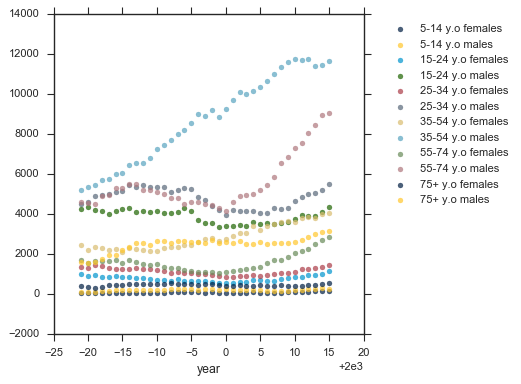

In [269]:
#A scatter plot of all age groups
ages.scatter("year")

In [549]:
#To create a scatter plot with only female data, a new table is produced that only contains female age groups
femaleAges = Table().with_columns("year", year, "5-14 y.o females", females5, 
                                        "15-24 y.o females", females15, 
                                        "25-34 y.o females", females25,
                                        "35-54 y.o females", females35, 
                                        "55-74 y.o females", females55, 
                                        "75+ y.o females", females75)

In [550]:
femaleAges

year | 5-14 y.o females | 15-24 y.o females | 25-34 y.o females | 35-54 y.o females | 55-74 y.o females | 75+ y.o females
1979 | 48               | 1001              | 1352              | 2458              | 1705              | 384
1980 | 26               | 903               | 1322              | 2214              | 1548              | 350
1981 | 48               | 960               | 1437              | 2374              | 1640              | 324
1982 | 40               | 864               | 1377              | 2304              | 1663              | 367
1983 | 53               | 864               | 1321              | 2176              | 1666              | 428
1984 | 55               | 877               | 1267              | 2267              | 1696              | 433
1985 | 73               | 854               | 1242              | 2105              | 1568              | 466
1986 | 56               | 844               | 1261              | 2299              | 1696              | 521
1987 | 52               | 815               | 1285              | 2270              | 1596              | 504
1988 | 62               | 786               | 1247              | 2209              | 1504              | 519
... (27 rows omitted)

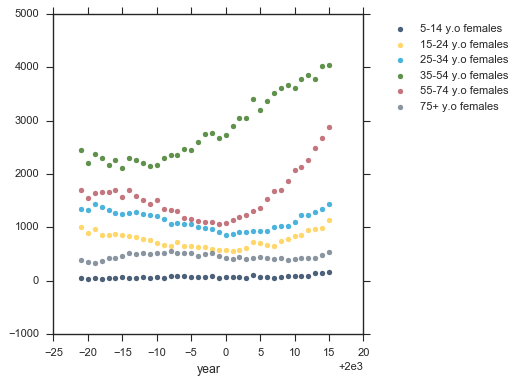

In [272]:
#a scatter plot based on all female ages
femaleAges.scatter("year")

In [273]:
#To create a scatter plot with only male data, a new table is produced that only contains male age groups
maleAges = Table().with_columns("year", year, "5-14 y.o males", males5, 
                                         "15-24 y.o males", males15,
                                         "25-34 y.o males", males25,
                                         "35-54 y.o males", males35,
                                         "55-74 y.o males", males55,
                                         "75+ y.o males", males75)



In [281]:
maleAges.show(37)

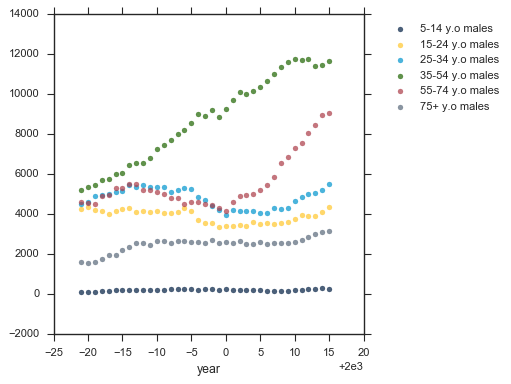

In [275]:
#a scatter plot based on all male ages
maleAges.scatter("year")

In [309]:
from scipy import stats

In [353]:
#Stats function from scipy that produces a student t test from given date
stats.ttest_ind(comp2.column("female suicides"), comp2.column("male suicides"))
##much smaller than .05, reject null hypothesis that there exists no difference in the number of male suicides vs. female suicides

Ttest_indResult(statistic=-31.432440705136294, pvalue=8.701559189670423e-44)

In [382]:
ages

year | 5-14 y.o females | 5-14 y.o males | 15-24 y.o females | 15-24 y.o males | 25-34 y.o females | 25-34 y.o males | 35-54 y.o females | 35-54 y.o males | 55-74 y.o females | 55-74 y.o males | 75+ y.o females | 75+ y.o males
1979 | 48               | 104            | 1001              | 4245            | 1352              | 4505            | 2458              | 5207            | 1705              | 4593            | 384             | 1587
1980 | 26               | 116            | 903               | 4336            | 1322              | 4598            | 2214              | 5344            | 1548              | 4538            | 350             | 1557
1981 | 48               | 119            | 960               | 4201            | 1437              | 4906            | 2374              | 5462            | 1640              | 4523            | 324             | 1580
1982 | 40               | 160            | 864               | 4161            | 1377              | 4939            | 2304              | 5721            | 1663              | 4890            | 367             | 1740
1983 | 53               | 152            | 864               | 3981            | 1321              | 5017            | 2176              | 5759            | 1666              | 4931            | 428             | 1932
1984 | 55               | 177            | 877               | 4149            | 1267              | 5125            | 2267              | 5983            | 1696              | 5295            | 433             | 1943
1985 | 73               | 205            | 854               | 4267            | 1242              | 5134            | 2105              | 6053            | 1568              | 5302            | 466             | 2177
1986 | 56               | 199            | 844               | 4276            | 1261              | 5450            | 2299              | 6450            | 1696              | 5500            | 521             | 2340
1987 | 52               | 199            | 815               | 4109            | 1285              | 5370            | 2270              | 6569            | 1596              | 5482            | 504             | 2532
1988 | 62               | 181            | 786               | 4143            | 1247              | 5463            | 2209              | 6528            | 1504              | 5198            | 519             | 2548
... (27 rows omitted)

In [488]:
#the table for "ages" was created in order to answer question 2
#question 2 specifically questions adolescences and youths. As a result a table containing the statistics for male and
#female youths and adolescences is created. This allows me to make visualizations to answer question 2 as posed in the
#paper.
youthAges = ages.select("year", "5-14 y.o females", "5-14 y.o males", "15-24 y.o females", "15-24 y.o males").where("year", are.above(1999))

In [489]:
youthAges

year | 5-14 y.o females | 5-14 y.o males | 15-24 y.o females | 15-24 y.o males
2000 | 63               | 244            | 570               | 3424
2001 | 65               | 214            | 562               | 3409
2002 | 65               | 199            | 578               | 3432
2003 | 56               | 194            | 607               | 3381
2004 | 98               | 187            | 720               | 3596
2005 | 68               | 204            | 714               | 3498
2006 | 66               | 153            | 661               | 3528
2007 | 53               | 131            | 659               | 3481
2008 | 68               | 154            | 738               | 3560
2009 | 90               | 175            | 776               | 3595
... (6 rows omitted)

In [426]:
#Break up data between males and females
youthAgesFemale = ages.select("year", "5-14 y.o females", "15-24 y.o females")

In [428]:
#Data for this visualization is restricted to 2000-2015 in order to prevent overcrowding in the visualizations.
youthAgesFemale = youthAgesFemale.where("year", are.above(1999))

In [436]:
youthAgesFemale.show(16)

Text(0.5,0,'Year')

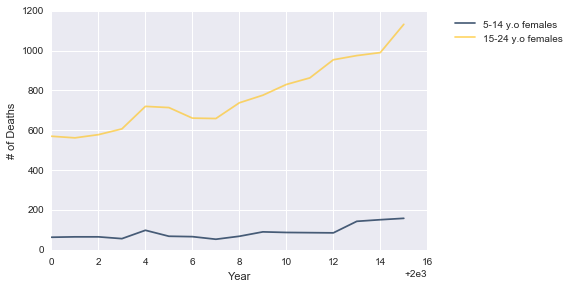

In [476]:
#a line plot for suicide rate for female youths and adolescences.
youthAgesFemale.plot("year")
plt.ylabel('# of Deaths')
plt.xlabel('Year')

In [459]:
#Break up data between males and females
youthAgesMale = ages.select("year", "5-14 y.o males", "15-24 y.o males")

In [461]:
#Data for this visualization is restricted to 2000-2015 in order to prevent overcrowding in the visualizations.
youthAgesMale = youthAgesMale.where("year", are.above(1999))

Text(0.5,0,'Year')

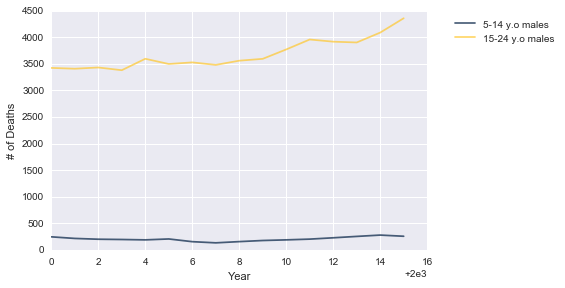

In [477]:
#a line plot for suicide rate for male youths and adolescences.
youthAgesMale.plot("year")
plt.ylabel('# of Deaths')
plt.xlabel('Year')

In [500]:
#used to find the median of diferent categories for a descriptive statistics table
from statistics import median

In [508]:
ages

year | 5-14 y.o females | 5-14 y.o males | 15-24 y.o females | 15-24 y.o males | 25-34 y.o females | 25-34 y.o males | 35-54 y.o females | 35-54 y.o males | 55-74 y.o females | 55-74 y.o males | 75+ y.o females | 75+ y.o males
1979 | 48               | 104            | 1001              | 4245            | 1352              | 4505            | 2458              | 5207            | 1705              | 4593            | 384             | 1587
1980 | 26               | 116            | 903               | 4336            | 1322              | 4598            | 2214              | 5344            | 1548              | 4538            | 350             | 1557
1981 | 48               | 119            | 960               | 4201            | 1437              | 4906            | 2374              | 5462            | 1640              | 4523            | 324             | 1580
1982 | 40               | 160            | 864               | 4161            | 1377              | 4939            | 2304              | 5721            | 1663              | 4890            | 367             | 1740
1983 | 53               | 152            | 864               | 3981            | 1321              | 5017            | 2176              | 5759            | 1666              | 4931            | 428             | 1932
1984 | 55               | 177            | 877               | 4149            | 1267              | 5125            | 2267              | 5983            | 1696              | 5295            | 433             | 1943
1985 | 73               | 205            | 854               | 4267            | 1242              | 5134            | 2105              | 6053            | 1568              | 5302            | 466             | 2177
1986 | 56               | 199            | 844               | 4276            | 1261              | 5450            | 2299              | 6450            | 1696              | 5500            | 521             | 2340
1987 | 52               | 199            | 815               | 4109            | 1285              | 5370            | 2270              | 6569            | 1596              | 5482            | 504             | 2532
1988 | 62               | 181            | 786               | 4143            | 1247              | 5463            | 2209              | 6528            | 1504              | 5198            | 519             | 2548
... (27 rows omitted)

In [534]:
#these are the categories which will appear in the descriptive statistics table
categories = ["Minimum", "Maximum", "Median", "Mean", "Standard Deviation"]

In [555]:
#the following arrays contain the categories labeled above for all females, all males, and the individual age ranges
#for men and women
allFemales = [np.min(total_suicides.column("female suicides")), np.max(total_suicides.column("female suicides")),
             median(total_suicides.column("female suicides")), np.mean(total_suicides.column("female suicides")), 
             np.std(total_suicides.column("female suicides"))]
allMales = [np.min(total_suicides.column("male suicides")), np.max(total_suicides.column("male suicides")),
             median(total_suicides.column("male suicides")), np.mean(total_suicides.column("male suicides")), 
             np.std(total_suicides.column("male suicides"))]
all5_14Females = [np.min(ages.column("5-14 y.o females")), np.max(ages.column("5-14 y.o females")),
             median(ages.column("5-14 y.o females")), np.mean(ages.column("5-14 y.o females")), 
             np.std(ages.column("5-14 y.o females"))]
all5_14Males = [np.min(ages.column("5-14 y.o males")), np.max(ages.column("5-14 y.o males")),
             median(ages.column("5-14 y.o males")), np.mean(ages.column("5-14 y.o males")), 
             np.std(ages.column("5-14 y.o males"))]
all15_24Females = [np.min(ages.column("15-24 y.o females")), np.max(ages.column("15-24 y.o females")),
             median(ages.column("15-24 y.o females")), np.mean(ages.column("15-24 y.o females")), 
             np.std(ages.column("15-24 y.o females"))]
all15_24Males = [np.min(ages.column("15-24 y.o males")), np.max(ages.column("15-24 y.o males")),
             median(ages.column("15-24 y.o males")), np.mean(ages.column("15-24 y.o males")), 
             np.std(ages.column("15-24 y.o males"))]
all25_34Females = [np.min(ages.column("25-34 y.o females")), np.max(ages.column("25-34 y.o females")),
             median(ages.column("25-34 y.o females")), np.mean(ages.column("25-34 y.o females")), 
             np.std(ages.column("25-34 y.o females"))]
all25_34Males = [np.min(ages.column("25-34 y.o males")), np.max(ages.column("25-34 y.o males")),
             median(ages.column("25-34 y.o males")), np.mean(ages.column("25-34 y.o males")), 
             np.std(ages.column("25-34 y.o males"))]
all35_54Females = [np.min(ages.column("35-54 y.o females")), np.max(ages.column("35-54 y.o females")),
             median(ages.column("35-54 y.o females")), np.mean(ages.column("35-54 y.o females")), 
             np.std(ages.column("35-54 y.o females"))]
all35_54Males = [np.min(ages.column("35-54 y.o males")), np.max(ages.column("35-54 y.o males")),
             median(ages.column("35-54 y.o males")), np.mean(ages.column("35-54 y.o males")), 
             np.std(ages.column("35-54 y.o males"))]
all55_74Females = [np.min(ages.column("55-74 y.o females")), np.max(ages.column("55-74 y.o females")),
             median(ages.column("55-74 y.o females")), np.mean(ages.column("55-74 y.o females")), 
             np.std(ages.column("55-74 y.o females"))]
all55_74Males = [np.min(ages.column("55-74 y.o males")), np.max(ages.column("55-74 y.o males")),
             median(ages.column("55-74 y.o males")), np.mean(ages.column("55-74 y.o males")), 
             np.std(ages.column("55-74 y.o males"))]
all75Females = [np.min(ages.column("75+ y.o females")), np.max(ages.column("75+ y.o females")),
             median(ages.column("75+ y.o females")), np.mean(ages.column("75+ y.o females")), 
             np.std(ages.column("75+ y.o females"))]
all75Males = [np.min(ages.column("75+ y.o males")), np.max(ages.column("75+ y.o males")),
             median(ages.column("75+ y.o males")), np.mean(ages.column("75+ y.o males")), 
             np.std(ages.column("75+ y.o males"))]

In [556]:
#Descriptive statistics table
statsTable = Table().with_columns(" ", categories, "All Females", allFemales, "All Males", allMales,
                                  "5-14 y.o females", all5_14Females, "5-14 y.o males", all5_14Males,
                                  "15-24 y.o females", all15_24Females, "15-24 y.o males", all15_24Males,
                                  "25-34 y.o females", all25_34Females, "25-34 y.o males", all25_34Males,
                                  "35-54 y.o females", all35_54Females, "35-54 y.o males", all35_54Males,
                                  "55-74 y.o females", all55_74Females, "55-74 y.o males", all55_74Males,
                                  "75+ y.o females", all75Females, "75+ y.o males", all75Males)

In [523]:
statsTable

| All Females | All Males | 5-14 y.o females | 5-14 y.o males | 15-24 y.o females | 15-24 y.o males | 25-34 y.o females | 25-34 y.o males | 35-54 y.o females | 35-54 y.o males | 55-74 y.o females | 55-74 y.o males | 75+ y.o females | 75+ y.o males
Minimum            | 5732        | 20241     | 26               | 104            | 562               | 3326            | 854               | 3938            | 2105              | 5207            | 1061              | 4153            | 324             | 1557
Maximum            | 10199       | 33990     | 158              | 277            | 1132              | 4359            | 1444              | 5503            | 4053              | 11767           | 2872              | 9068            | 549             | 3171
Median             | 6508        | 24752     | 68               | 199            | 738               | 3981            | 1092              | 4906            | 2674              | 8920            | 1536              | 4989            | 443             | 2566
Mean               | 6854.3      | 25616     | 73.4324          | 197.405        | 766.811           | 3887.81         | 1131.68           | 4793            | 2847.7            | 8724.89         | 1581.32           | 5539.16         | 453.351         | 2473.73
Standard Deviation | 1114.96     | 3403.36   | 27.7475          | 41.1388        | 142.997           | 326.537         | 172.309           | 488.83          | 620.591           | 2175.16         | 441.947           | 1325.91         | 55.472          | 379.79

In [569]:
#places student t test that was run above into a formated table
labels = ["Statistic", "P-Value", "Null Hypothesis"]
values = ["-31.432", "8.702e-44", "Reject"]
t_test = Table().with_column(" ", labels, "Two Sample T-Test Conducted b/t Male and Female Suicide Rate", values)

In [570]:
t_test

| Two Sample T-Test Conducted b/t Male and Female Suicide Rate
Statistic       | -31.432
P-Value         | 8.702e-44
Null Hypothesis | Reject